# Lab 6: value iteration

## Frozen Lake

Let's look at a Frozen Lake environment. It's a grid-world with a goal and a chance that some movements will slip and perform a random action. Moreover, there are some dangerous areas that terminate the episode with large penalty.

Let's have a such environment:
- Illegal state cannot be visited by the agent. This is for example the wall ('#' symbol).
- Terminal state is absorbing, there are no transitions leading from the state - game ends when it is visited by the agent. Note that walls ('#' symbol) are terminal states as well, although they can never be accessed by the agent.

In [1]:
import numpy as np, random
import matplotlib.pyplot as plt
from typing import List, Tuple

#set random seed.
random.seed(0)
np.random.seed(0)

example_map =  ["#########",
                "#       #",
                "#       #",
                "# ooooo #",
                "#   #  G#",
                "#########"]

# # = wall
# G = goal
# o = pit

Action = str # Action corresponds to a movement ['^', 'v', '<', '>'].
State = Tuple[int, int]  # State corresponds to a coordinate in the map.

class FrozenLake():
  ILLEGAL  = {"#"}
  TERMINAL = {"o", "G", "#"}
  REWARDS  = {
    "#": -0.1,
    " ": -0.1,
    "G":  1,
    "o": -10
    }
  MOVE_DIFFS = {
    '^': [-1,  0], # Move up.
    '<': [ 0, -1], # Move down.
    '>': [ 0,  1], # Move left.
    'v': [ 1,  0], # Move right.
    }

  def __init__(self, map: List[str], slip_probability: float):
    self.map = [list(row) for row in map]
    self.slip_probability = slip_probability 

  def num_rows(self) -> int:
    return len(self.map)

  def num_cols(self) -> int:
    return len(self.map[0])

  def actions(self) -> List[Action]:
    ''' Return all possible actions '''
    return self.MOVE_DIFFS.keys()

  def get_non_terminal_states(self) -> List[State]:
    ''' Return all non terminal states'''
    non_terminal_states = []
    for i in range(self.num_rows()):
      for j in range(self.num_cols()):
        if self.map[i][j] not in self.TERMINAL:
          non_terminal_states.append((i,j))
    return non_terminal_states

  def get_transitions(self, state: State, action: Action) -> List[Tuple[State, float, float]]:
    ''' Given state and action, return all probabilities of transitions. '''
    transitions = []
    if self.map[state[0]][state[1]] in self.TERMINAL:
      return []

    for a in self.actions():
      di, dj = self.MOVE_DIFFS[a]
      next_state = (state[0] + di, state[1] + dj)
      
      symbol = self.map[next_state[0]][next_state[1]]
      if symbol in self.ILLEGAL:
        next_state = state

      reward = self.REWARDS[symbol]

      if a == action:
        prob = (1 - self.slip_probability) + (self.slip_probability / len(self.actions()))
      else:
        prob = self.slip_probability / len(self.actions())

      transitions.append((next_state, prob, reward))
    return transitions

Let's have a look at the transisitons form [3, 7] state with MOVE_DOWN (just up of the goal).



In [2]:
map = ["#########",
       "#       #",
       "#       #",
       "# ooooo #",
       "#   #  G#",
       "#########"]

lake = FrozenLake(map, slip_probability=0.1)
lake.get_transitions([3, 7], 'v')

[((2, 7), 0.025, -0.1),
 ((3, 6), 0.025, -10),
 ([3, 7], 0.025, -0.1),
 ((4, 7), 0.925, 1)]

## Value Iteration

Now, let's implement the Value Iteration algorithm. Remember how it goes:

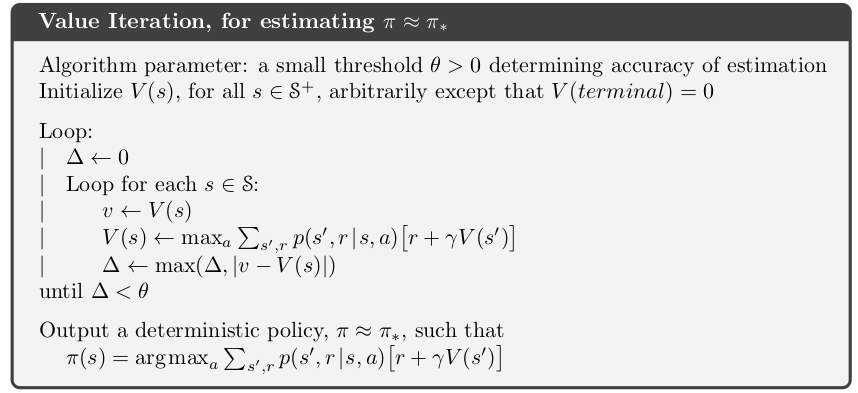

In [ ]:
# Auxiliary method to plot the values.
def plot_v(v: np.array, labels=None):
  im = plt.imshow(v, vmin=-2., vmax=1.)

  if labels is None:
    labels = v

  # Loop over data dimensions and create text annotations.
  for i in range(v.shape[0]):
    for j in range(v.shape[1]):
      if labels.dtype == np.float32:
        label = f"{labels[i, j]:.2f}"
      else:
        label = labels[i, j]

      text = plt.text(j, i, label, ha="center", va="center", color="w")

  plt.tight_layout()
  plt.show()


# Compute the expected value for transitions from the same state and current values v.
# we'll call it like `get_expected_value( problem.get_transitions(s, a), v, gamma )`
def get_expected_value(transitions: List[Tuple[State, float, float]], 
                       v: np.array, 
                       gamma: float) -> float:
  # Task:
  # - return expected reward for the list of transitions
  # - we assume that the transitions come from problem.get_transitions()
  #   and that their probabilities sum to one
  v_exp = 0.0
  for transition in transitions:
    next_state, reward, probability = transition
    v_exp += probability * (reward + gamma * v[next_state])


  return v_exp

# Run the value iteration algorithm.
def value_iteration(problem: FrozenLake, gamma: float, threshold: float = 0.01):
  v: np.array = np.zeros_like(problem.map, dtype=np.float32)
  plot_v(v)

  # Task:
  # - implement the value iteration algorithm
  # - hint: see the pseudocode above
  while(threshold > 0):
    for state in 
  return v

Let's try it on a simple map:

In [ ]:
GAMMA = 0.99
SLIP_PROBABILITY = 0.1

lake = FrozenLake(map, SLIP_PROBABILITY)
v = value_iteration(lake,  GAMMA)

Look above at the graphs.

**Question**: Why do we need set a discount factor ($\gamma$)?


**Question**: Why do the walls, the pit and goal have 0. value?


**Question**: Why are the values high in the right bottom and low in left bottom?


**Question**: In the step 1, explain how was the value at v[4, 1] = -0.1 computed.


**Question**: In the step 1, explain how was the value at v[3, 1] = -0.35 computed.


**Question**: In the last step 20, explain how was the value at v[3, 7] = 0.70 computed.



**Question**: Look at the resulting value function, what is the optimal policy?

Let's show how the policy looks:

In [ ]:
def get_policy(problem: FrozenLake, v: np.array, gamma: float):
  pi: np.array = np.full_like(problem.map, ' ', dtype=object)
  # pi is now an array of characters.

  # Task
  # - update pi so it contains the best action for each state

  return pi

In [ ]:
pi = get_policy(lake, v, GAMMA)
plot_v(v, labels=pi)

**Question:** Is there an alternative way that would allow us just to look at a maximum of a function to immediately tell which action to perform? (without computing the expected values)



## VI robustness

First of all, let's notice that we don't have to update all values first and then use the results. We can actually update them asynchronously in-place. Let's try that:

In [ ]:
def value_iteration_async(problem: FrozenLake, gamma: float, threshold: float = 0.01):
  v: np.array = np.zeros_like(problem.map, dtype=np.float32)
  max_delta = np.inf

  # Task 
  # - copy the previous function
  # - make the updates asynchronous - don't make a copy of v

  return v

v = value_iteration_async(lake,  GAMMA)

Our new version converged a bit faster, cool!

Another observation is that the order of updates does not matter, as long as we update all states in the end. Maybe there is some optimal order, but for now, let's just look how it goes with a random order:

In [ ]:
def value_iteration_async_random(problem: FrozenLake, gamma: float, threshold: float = 0.01):
  v: np.array = np.zeros_like(problem.map, dtype=np.float32)
  max_delta = np.inf

  # Task 
  # - copy the previous function
  # - update it so it takes random order of updates
  # - you can use `random.sample()` with a complete population size to get a list permutation


  return v

v = value_iteration_async_random(lake,  GAMMA)

Cool, still works. It can converge faster or slower, it's random afterall. 

VI works even for arbitrary initial values, let's try.

In [ ]:
def value_iteration_async_random_randinit(problem: FrozenLake, gamma: float, threshold: float = 0.01):
  v: np.array = np.zeros_like(problem.map, dtype=np.float32)

  # Task 
  # - copy the previous function
  # - randomly initialize the value function uniformly in range [-1, 1]
  

  return v

v = value_iteration_async_random_randinit(lake,  GAMMA)

Nice! It still converges.

## Contraction of the Bellman operator

**A bonus task - if there's time.**

Let's prove that the Bellman operator is a contraction!

We need to define some things first. Let's have an MDP with:
- states $\mathcal S = \{s_1, s_2, ..., s_n\}$
- actions $\mathcal A = \{a_1, a_2, ..., a_m\}$
- expected reward $\mathcal R^a_s$ in state $s$ when taking action $a$
- probability $\mathcal P^a_{s,s'}$ of transition $s \xrightarrow{a} s'$
- a discount factor $\gamma \in [0, 1)$

Let $\pi(a|s)$ denote the probability of taking action $a$ in state $s$ under policy $\pi$.

Let's define some more useful quantities. An expected reward under policy $\pi$ is:
$$ \mathbf{R}_\pi(s) = \sum_{a \in \mathcal A} \pi(a|s) \mathcal R^a_s $$

And the probability of transition under policy $\pi$ is:
$$ \mathbf{P}_\pi(s, s') = \sum_{a \in \mathcal A} \pi(a|s) \mathcal P^a_{s, s'} $$

A value function is $v: \mathcal S \rightarrow \mathbb R$. 

For the ease of notation, let's view $v$ as a vector of values $[v(s_1), v(s_2), ..., v(s_n)]$. Similarly, let's overload $\mathbf R_\pi = [\mathbf R_\pi(s_1), \mathbf R_\pi(s_2), ..., \mathbf R_\pi(s_n)]$ and $\mathbf P_\pi$ as a matrix $\mathbf P_\pi = [\mathbf P_\pi(s_i, s_j)]; i,j \in \{1..n\}$.

A value function for a policy $\pi$ satisfies $v_\pi = \mathbf R_\pi +  \gamma \mathbf P_\pi v_\pi$. 

<!-- An optimal value function $v_*(s) = \max_{\pi} v_\pi(s), \forall s$ satisfies $v_*(s) = \mathbf R_\pi(s) + \gamma \max_a v_*(s')$ -->

Let $\mathbf B_\pi$ be a *Bellman policy operator*: $\mathbf B_\pi v = \mathbf R_\pi + \gamma \mathbf P_\pi v$.

Let $||\mathbf x||_\infty = \max(x_1, x_2, ...)$ be a *max* norm.


**Task:** Prove that $\mathbf B_\pi$ is a contraction under *max* norm, i.e. $|| \mathbf B_\pi v_1 - \mathbf B_\pi v_2||_\infty \leq \gamma || v_1 - v_2 ||_\infty$ for any $v_1, v_2$.



---



Since $\mathbf B_\pi$ is a contraction, then we can apply the Contraction Mapping Theorem (see https://en.wikipedia.org/wiki/Banach_fixed-point_theorem) to claim it has a unique fixed point, which is $v_\pi$. 

Similarly, the *Bellman Optimality operator* $\mathbf (\mathbf B_* v)(s) = \max_a \left[ \mathcal R_s^a + \gamma \sum_{s' \in \mathcal S} \mathcal P^a_{s,s'} v(s') \right]$ converges to $v_*$. (proof as a homework ;-)).